Midterm review material

PUI2018

October 29 2018

Federica B Bianco

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#why-the-shapefiles-from-NYC-DATA-portal-export-the-way-they-do-(API-vs-static-link)" data-toc-modified-id="why-the-shapefiles-from-NYC-DATA-portal-export-the-way-they-do-(API-vs-static-link)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>why the shapefiles from NYC DATA portal export the way they do (API vs static link)</a></div><div class="lev1 toc-item"><a href="#GeoDataFrame-plotting-and-axis-ratio-control-(requested-topic)" data-toc-modified-id="GeoDataFrame-plotting-and-axis-ratio-control-(requested-topic)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GeoDataFrame plotting and axis ratio control (requested topic)</a></div><div class="lev1 toc-item"><a href="#how-to-extract-rows-and-separate-based-on-a-time-stamp-(requested-topic)" data-toc-modified-id="how-to-extract-rows-and-separate-based-on-a-time-stamp-(requested-topic)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>how to extract rows and separate based on a time stamp (requested topic)</a></div><div class="lev1 toc-item"><a href="#How-to-use-the-Chi-Square-test---(requested-topic)" data-toc-modified-id="How-to-use-the-Chi-Square-test---(requested-topic)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How to use the Chi Square test - (requested topic)</a></div><div class="lev1 toc-item"><a href="#REMINDERS:-I-may-add-to-this,-continue-checking." data-toc-modified-id="REMINDERS:-I-may-add-to-this,-continue-checking.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>REMINDERS: I may add to this, continue checking.</a></div><div class="lev2 toc-item"><a href="#reminder-about-spatial-joins-and-spatial-comparisons:-YOU-NEED-TO-BE-IN-THE-SAME-COORDINATE-SYSTEM!-and-in-most-cases-you-should-be-in-a-Cartesian-coordinate-system,-like-epsg=2263" data-toc-modified-id="reminder-about-spatial-joins-and-spatial-comparisons:-YOU-NEED-TO-BE-IN-THE-SAME-COORDINATE-SYSTEM!-and-in-most-cases-you-should-be-in-a-Cartesian-coordinate-system,-like-epsg=2263-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>reminder about spatial joins and spatial comparisons: YOU NEED TO BE IN THE SAME COORDINATE SYSTEM! and in most cases you should be in a Cartesian coordinate system, like epsg=2263</a></div><div class="lev2 toc-item"><a href="#reminder:-review-basig-merging-and-gruoing-operators:-.merge(),-.groupby()" data-toc-modified-id="reminder:-review-basig-merging-and-gruoing-operators:-.merge(),-.groupby()-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>reminder: review basig merging and gruoing operators: .merge(), .groupby()</a></div><div class="lev2 toc-item"><a href="#Reminder:-Spatial-weights.-You-can-create-weights-from-a-shapefile-or-from-a-read-in-GeoDataFrame" data-toc-modified-id="Reminder:-Spatial-weights.-You-can-create-weights-from-a-shapefile-or-from-a-read-in-GeoDataFrame-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Reminder: Spatial weights. You can create weights from a shapefile or from a read in GeoDataFrame</a></div>

In [45]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [104]:
import scipy as sp
from scipy import stats

In [2]:
os.getenv("PUIDATA")

'/Users/fbb/Dropbox//UI/PUIdata'

# why the shapefiles from NYC DATA portal export the way they do (API vs static link)

In [14]:
url = "https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "file.gz")
!unzip -d $PUIDATA file.gz

Archive:  file.gz
  inflating: /Users/fbb/Dropbox//UI/PUIdata/geo_export_959f504f-c8cc-4488-a74e-fb4045451f20.dbf  
  inflating: /Users/fbb/Dropbox//UI/PUIdata/geo_export_959f504f-c8cc-4488-a74e-fb4045451f20.shp  
  inflating: /Users/fbb/Dropbox//UI/PUIdata/geo_export_959f504f-c8cc-4488-a74e-fb4045451f20.shx  
  inflating: /Users/fbb/Dropbox//UI/PUIdata/geo_export_959f504f-c8cc-4488-a74e-fb4045451f20.prj  


code below  would not work

In [8]:
!curl -O https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile

In [9]:
!curl -O https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100     2    0     2    0     0      2      0 --:--:-- --:--:-- --:--:--    17


In [13]:
!ls -ltr


total 3800
-rw-r--r--  1 fbb  staff  1930540 Oct 29 11:37 file.gz
-rw-r--r--  1 fbb  staff        2 Oct 29 11:37 fxpq-c8ku
-rw-r--r--  1 fbb  staff     5196 Oct 29 11:38 Untitled.ipynb


each link grabbed with an has a unique name (cause it is packaged on the spot) but that is a small violation of the reproducibility rules which I will allow!

In [17]:
ct = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "geo_export_959f504f-c8cc-4488-a74e-fb4045451f20.shp")


# GeoDataFrame plotting and axis ratio control (requested topic)

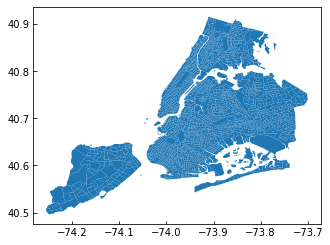

In [18]:
ct.plot()

In [19]:
ct.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...


In [25]:
man = ct[ct['boro_name'] == "Manhattan"]

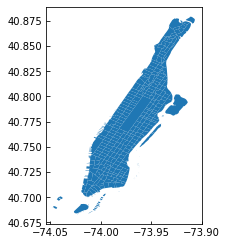

In [26]:
man.plot()

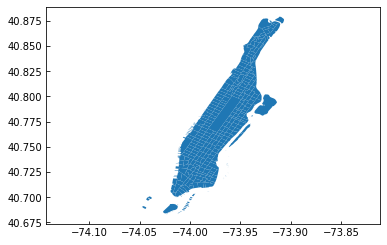

In [27]:
ax = man.plot()
ax.axes.set_aspect('equal', 'datalim')

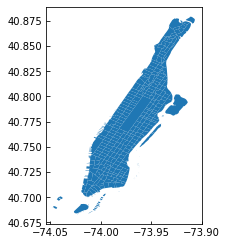

In [28]:
ax = man.plot()
ax.axes.set_aspect('equal')

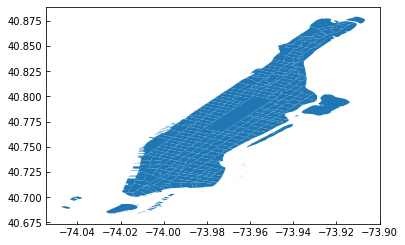

In [30]:
ax = man.plot()
ax.axes.set_aspect('auto', 'datalim')

<Figure size 720x720 with 0 Axes>

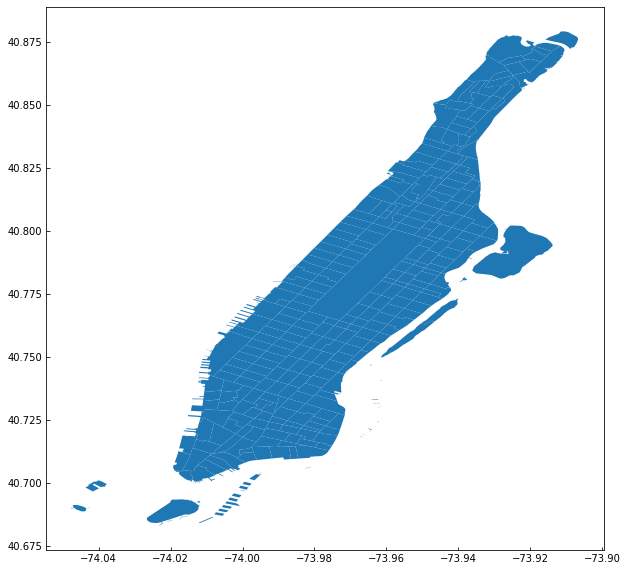

In [34]:
ax = pl.figure(figsize(10,10)).add_subplot()
ax = man.plot(ax=ax)
ax.axes.set_aspect('auto', 'datalim')

In [35]:
ax.axes.set_aspect?

<Figure size 360x360 with 0 Axes>

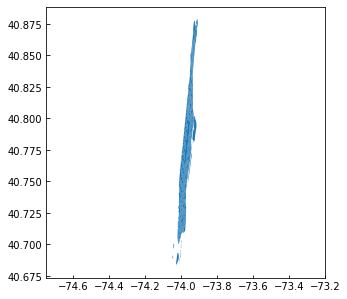

In [36]:
ax = pl.figure(figsize(5,5)).add_subplot()
ax = man.plot(ax=ax)
ax.axes.set_aspect(7, 'datalim')

other than controlling the axis ratio, control the coordinates! make sure they are the appropriate coordinates for the data you want to plot

In [37]:
man.crs

{'init': 'epsg:4326'}

In [38]:
man.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98411754823195 40.7548420534646,..."


converting to State Plane coordinates (Cartesian)

In [ ]:
man = man.to_crs(epsg = 2263)

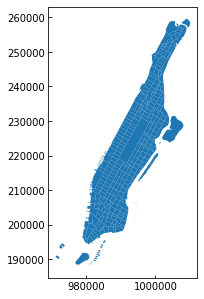

In [40]:
man.plot()

In [46]:
! cp ../HW5_fb55_session1/getCitiBikeCSV.py ../HW5_fb55_session1/get_jsonparsed_data.py .



In [47]:
datestring01 = '201501'
getCitiBikeCSV(datestring01)


file in place, you can continue


In [48]:
cb201501 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring01 + '-citibike-tripdata.csv')
cb201501.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


subsampling the data so I do not have to deal with a large dataset while I develope my analysis!

In [49]:
#take one every 1000 rows
cb2015 = cb201501[::1000]

In [50]:
cb2015.shape

(286, 15)

# how to extract rows and separate based on a time stamp (requested topic)

In [51]:
cb2015.starttime

0           1/1/2015 0:01
1000       1/1/2015 10:46
2000       1/1/2015 13:39
3000       1/1/2015 15:48
4000       1/1/2015 17:51
5000       1/1/2015 21:48
6000        1/2/2015 7:30
7000        1/2/2015 9:04
8000       1/2/2015 10:47
9000       1/2/2015 12:23
10000      1/2/2015 13:37
11000      1/2/2015 14:49
12000      1/2/2015 15:55
13000      1/2/2015 16:53
14000      1/2/2015 17:50
15000      1/2/2015 19:05
16000      1/2/2015 21:16
17000       1/3/2015 6:49
18000      1/3/2015 10:17
19000      1/3/2015 11:46
20000      1/3/2015 13:52
21000      1/3/2015 22:15
22000      1/4/2015 10:44
23000      1/4/2015 12:25
24000      1/4/2015 13:47
25000      1/4/2015 15:03
26000      1/4/2015 16:14
27000      1/4/2015 17:33
28000      1/4/2015 19:09
29000       1/5/2015 0:41
               ...       
256000     1/27/2015 8:49
257000    1/27/2015 21:55
258000     1/28/2015 9:23
259000    1/28/2015 14:07
260000    1/28/2015 17:03
261000    1/28/2015 18:31
262000    1/28/2015 21:00
263000     1

converting strings to datetime - also look at the "format" argument and the "error" argument. Particularly: if some of the rows cannot be converted (say that there may have been issued with the inputting of the information, wrong formats etc) the error="coerce" argument will force the conversion setting the problematic values to NaT (not a time, equivalent to NaN for floats)


In [142]:
cb2015['date'] = pd.to_datetime(cb2015.starttime, infer_datetime_format=True)
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
cb2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,lonlat,geometry
index_right,,,,,,,,,,,,,,,,,,,
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0,"(-73.96905301, 40.75001986)",POINT (-73.96905301 40.75001986)
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00,10,"(-73.99144871, 40.74395411)",POINT (-73.99144871 40.74395411)
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00,13,"(-73.989111, 40.722055)",POINT (-73.98911099999999 40.722055)
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00,15,"(-73.98889957, 40.73223272)",POINT (-73.98889957 40.73223272)
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00,17,"(-73.986923, 40.734232)",POINT (-73.986923 40.734232)


below I create a list comprehension to create an array of boolean values (True/False) which I will use to subselect rows from the original dataframe

In [55]:
#regular for loop
for x in cb2015.starttime.values:
    print(x)

1/1/2015 0:01
1/1/2015 10:46
1/1/2015 13:39
1/1/2015 15:48
1/1/2015 17:51
1/1/2015 21:48
1/2/2015 7:30
1/2/2015 9:04
1/2/2015 10:47
1/2/2015 12:23
1/2/2015 13:37
1/2/2015 14:49
1/2/2015 15:55
1/2/2015 16:53
1/2/2015 17:50
1/2/2015 19:05
1/2/2015 21:16
1/3/2015 6:49
1/3/2015 10:17
1/3/2015 11:46
1/3/2015 13:52
1/3/2015 22:15
1/4/2015 10:44
1/4/2015 12:25
1/4/2015 13:47
1/4/2015 15:03
1/4/2015 16:14
1/4/2015 17:33
1/4/2015 19:09
1/5/2015 0:41
1/5/2015 7:12
1/5/2015 8:03
1/5/2015 8:39
1/5/2015 9:14
1/5/2015 10:25
1/5/2015 12:31
1/5/2015 14:10
1/5/2015 15:42
1/5/2015 16:49
1/5/2015 17:31
1/5/2015 18:06
1/5/2015 18:42
1/5/2015 19:35
1/5/2015 21:31
1/6/2015 6:41
1/6/2015 7:55
1/6/2015 8:42
1/6/2015 10:53
1/6/2015 15:30
1/6/2015 17:22
1/6/2015 18:19
1/6/2015 19:29
1/6/2015 22:22
1/7/2015 7:31
1/7/2015 8:35
1/7/2015 9:29
1/7/2015 11:51
1/7/2015 14:19
1/7/2015 16:21
1/7/2015 17:32
1/7/2015 18:26
1/7/2015 19:51
1/8/2015 5:52
1/8/2015 8:14
1/8/2015 9:14
1/8/2015 11:49
1/8/2015 14:37
1/8/2015 16:4

In [145]:
#regular for loop to create a list
tmp_ = []
for x in cb2015.starttime.values:
    tmp_.append(x)
tmp_

['1/1/2015 0:01',
 '1/1/2015 10:46',
 '1/1/2015 13:39',
 '1/1/2015 15:48',
 '1/1/2015 17:51',
 '1/1/2015 21:48',
 '1/2/2015 7:30',
 '1/2/2015 9:04',
 '1/2/2015 10:47',
 '1/2/2015 12:23',
 '1/2/2015 14:49',
 '1/2/2015 15:55',
 '1/2/2015 16:53',
 '1/2/2015 17:50',
 '1/2/2015 19:05',
 '1/2/2015 21:16',
 '1/3/2015 6:49',
 '1/3/2015 10:17',
 '1/3/2015 11:46',
 '1/3/2015 13:52',
 '1/3/2015 22:15',
 '1/4/2015 10:44',
 '1/4/2015 12:25',
 '1/4/2015 13:47',
 '1/4/2015 15:03',
 '1/4/2015 16:14',
 '1/4/2015 17:33',
 '1/5/2015 0:41',
 '1/5/2015 7:12',
 '1/5/2015 8:03',
 '1/5/2015 8:39',
 '1/5/2015 9:14',
 '1/5/2015 10:25',
 '1/5/2015 12:31',
 '1/5/2015 14:10',
 '1/5/2015 15:42',
 '1/5/2015 16:49',
 '1/5/2015 17:31',
 '1/5/2015 18:06',
 '1/5/2015 18:42',
 '1/5/2015 19:35',
 '1/5/2015 21:31',
 '1/6/2015 6:41',
 '1/6/2015 7:55',
 '1/6/2015 8:42',
 '1/6/2015 10:53',
 '1/6/2015 15:30',
 '1/6/2015 17:22',
 '1/6/2015 18:19',
 '1/6/2015 19:29',
 '1/6/2015 22:22',
 '1/7/2015 7:31',
 '1/7/2015 8:35',
 '1/7/2

In [54]:
#equivalent list comprehension
[x for x in cb2015.starttime.values]

['1/1/2015 0:01',
 '1/1/2015 10:46',
 '1/1/2015 13:39',
 '1/1/2015 15:48',
 '1/1/2015 17:51',
 '1/1/2015 21:48',
 '1/2/2015 7:30',
 '1/2/2015 9:04',
 '1/2/2015 10:47',
 '1/2/2015 12:23',
 '1/2/2015 13:37',
 '1/2/2015 14:49',
 '1/2/2015 15:55',
 '1/2/2015 16:53',
 '1/2/2015 17:50',
 '1/2/2015 19:05',
 '1/2/2015 21:16',
 '1/3/2015 6:49',
 '1/3/2015 10:17',
 '1/3/2015 11:46',
 '1/3/2015 13:52',
 '1/3/2015 22:15',
 '1/4/2015 10:44',
 '1/4/2015 12:25',
 '1/4/2015 13:47',
 '1/4/2015 15:03',
 '1/4/2015 16:14',
 '1/4/2015 17:33',
 '1/4/2015 19:09',
 '1/5/2015 0:41',
 '1/5/2015 7:12',
 '1/5/2015 8:03',
 '1/5/2015 8:39',
 '1/5/2015 9:14',
 '1/5/2015 10:25',
 '1/5/2015 12:31',
 '1/5/2015 14:10',
 '1/5/2015 15:42',
 '1/5/2015 16:49',
 '1/5/2015 17:31',
 '1/5/2015 18:06',
 '1/5/2015 18:42',
 '1/5/2015 19:35',
 '1/5/2015 21:31',
 '1/6/2015 6:41',
 '1/6/2015 7:55',
 '1/6/2015 8:42',
 '1/6/2015 10:53',
 '1/6/2015 15:30',
 '1/6/2015 17:22',
 '1/6/2015 18:19',
 '1/6/2015 19:29',
 '1/6/2015 22:22',
 '1/7

In [56]:
[x.split() for x in cb2015.starttime.values]

[['1/1/2015', '0:01'],
 ['1/1/2015', '10:46'],
 ['1/1/2015', '13:39'],
 ['1/1/2015', '15:48'],
 ['1/1/2015', '17:51'],
 ['1/1/2015', '21:48'],
 ['1/2/2015', '7:30'],
 ['1/2/2015', '9:04'],
 ['1/2/2015', '10:47'],
 ['1/2/2015', '12:23'],
 ['1/2/2015', '13:37'],
 ['1/2/2015', '14:49'],
 ['1/2/2015', '15:55'],
 ['1/2/2015', '16:53'],
 ['1/2/2015', '17:50'],
 ['1/2/2015', '19:05'],
 ['1/2/2015', '21:16'],
 ['1/3/2015', '6:49'],
 ['1/3/2015', '10:17'],
 ['1/3/2015', '11:46'],
 ['1/3/2015', '13:52'],
 ['1/3/2015', '22:15'],
 ['1/4/2015', '10:44'],
 ['1/4/2015', '12:25'],
 ['1/4/2015', '13:47'],
 ['1/4/2015', '15:03'],
 ['1/4/2015', '16:14'],
 ['1/4/2015', '17:33'],
 ['1/4/2015', '19:09'],
 ['1/5/2015', '0:41'],
 ['1/5/2015', '7:12'],
 ['1/5/2015', '8:03'],
 ['1/5/2015', '8:39'],
 ['1/5/2015', '9:14'],
 ['1/5/2015', '10:25'],
 ['1/5/2015', '12:31'],
 ['1/5/2015', '14:10'],
 ['1/5/2015', '15:42'],
 ['1/5/2015', '16:49'],
 ['1/5/2015', '17:31'],
 ['1/5/2015', '18:06'],
 ['1/5/2015', '18:42'],
 

In [57]:
[x.split()[0] for x in cb2015.starttime.values]

['1/1/2015',
 '1/1/2015',
 '1/1/2015',
 '1/1/2015',
 '1/1/2015',
 '1/1/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/2/2015',
 '1/3/2015',
 '1/3/2015',
 '1/3/2015',
 '1/3/2015',
 '1/3/2015',
 '1/4/2015',
 '1/4/2015',
 '1/4/2015',
 '1/4/2015',
 '1/4/2015',
 '1/4/2015',
 '1/4/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/5/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/6/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/7/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/8/2015',
 '1/9/2015',
 '1/9/2015',
 '1/9/2015',
 '1/9/2015',
 '1/9/2015',
 '1/9/2015',

In [58]:
[x.split()[1] for x in cb2015.starttime.values]

['0:01',
 '10:46',
 '13:39',
 '15:48',
 '17:51',
 '21:48',
 '7:30',
 '9:04',
 '10:47',
 '12:23',
 '13:37',
 '14:49',
 '15:55',
 '16:53',
 '17:50',
 '19:05',
 '21:16',
 '6:49',
 '10:17',
 '11:46',
 '13:52',
 '22:15',
 '10:44',
 '12:25',
 '13:47',
 '15:03',
 '16:14',
 '17:33',
 '19:09',
 '0:41',
 '7:12',
 '8:03',
 '8:39',
 '9:14',
 '10:25',
 '12:31',
 '14:10',
 '15:42',
 '16:49',
 '17:31',
 '18:06',
 '18:42',
 '19:35',
 '21:31',
 '6:41',
 '7:55',
 '8:42',
 '10:53',
 '15:30',
 '17:22',
 '18:19',
 '19:29',
 '22:22',
 '7:31',
 '8:35',
 '9:29',
 '11:51',
 '14:19',
 '16:21',
 '17:32',
 '18:26',
 '19:51',
 '5:52',
 '8:14',
 '9:14',
 '11:49',
 '14:37',
 '16:43',
 '17:50',
 '18:52',
 '20:45',
 '6:24',
 '9:35',
 '13:07',
 '15:18',
 '16:53',
 '17:54',
 '18:54',
 '20:58',
 '8:22',
 '11:17',
 '13:19',
 '15:03',
 '16:53',
 '19:49',
 '7:56',
 '11:09',
 '12:53',
 '14:27',
 '16:01',
 '17:22',
 '19:16',
 '22:57',
 '7:24',
 '8:38',
 '11:54',
 '16:52',
 '17:49',
 '18:33',
 '19:27',
 '20:54',
 '5:29',
 '7:3

In [59]:
[x.split()[1].split()[0] for x in cb2015.starttime.values]

['0:01',
 '10:46',
 '13:39',
 '15:48',
 '17:51',
 '21:48',
 '7:30',
 '9:04',
 '10:47',
 '12:23',
 '13:37',
 '14:49',
 '15:55',
 '16:53',
 '17:50',
 '19:05',
 '21:16',
 '6:49',
 '10:17',
 '11:46',
 '13:52',
 '22:15',
 '10:44',
 '12:25',
 '13:47',
 '15:03',
 '16:14',
 '17:33',
 '19:09',
 '0:41',
 '7:12',
 '8:03',
 '8:39',
 '9:14',
 '10:25',
 '12:31',
 '14:10',
 '15:42',
 '16:49',
 '17:31',
 '18:06',
 '18:42',
 '19:35',
 '21:31',
 '6:41',
 '7:55',
 '8:42',
 '10:53',
 '15:30',
 '17:22',
 '18:19',
 '19:29',
 '22:22',
 '7:31',
 '8:35',
 '9:29',
 '11:51',
 '14:19',
 '16:21',
 '17:32',
 '18:26',
 '19:51',
 '5:52',
 '8:14',
 '9:14',
 '11:49',
 '14:37',
 '16:43',
 '17:50',
 '18:52',
 '20:45',
 '6:24',
 '9:35',
 '13:07',
 '15:18',
 '16:53',
 '17:54',
 '18:54',
 '20:58',
 '8:22',
 '11:17',
 '13:19',
 '15:03',
 '16:53',
 '19:49',
 '7:56',
 '11:09',
 '12:53',
 '14:27',
 '16:01',
 '17:22',
 '19:16',
 '22:57',
 '7:24',
 '8:38',
 '11:54',
 '16:52',
 '17:49',
 '18:33',
 '19:27',
 '20:54',
 '5:29',
 '7:3

In [60]:
cb2015['hour'] = pd.to_numeric([x.split()[1].split(':')[0] for x in cb2015.starttime.values])
cb2015.head()

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00,10
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00,13
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00,15
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00,17


creating the array of boolean values based on the extracted starttime hour

In [61]:
[(cb2015['hour'] > 18) | (cb2015['hour'] < 8)]

[0          True
 1000      False
 2000      False
 3000      False
 4000      False
 5000       True
 6000       True
 7000      False
 8000      False
 9000      False
 10000     False
 11000     False
 12000     False
 13000     False
 14000     False
 15000      True
 16000      True
 17000      True
 18000     False
 19000     False
 20000     False
 21000      True
 22000     False
 23000     False
 24000     False
 25000     False
 26000     False
 27000     False
 28000      True
 29000      True
           ...  
 256000    False
 257000     True
 258000    False
 259000    False
 260000    False
 261000    False
 262000     True
 263000     True
 264000    False
 265000    False
 266000    False
 267000    False
 268000    False
 269000    False
 270000     True
 271000     True
 272000     True
 273000    False
 274000    False
 275000    False
 276000    False
 277000    False
 278000    False
 279000    False
 280000     True
 281000    False
 282000    False
 283000    Fal

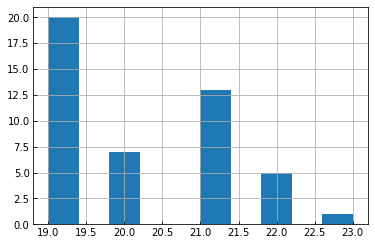

In [64]:
cb2015[(cb2015['hour'] > 18)].hour.hist()

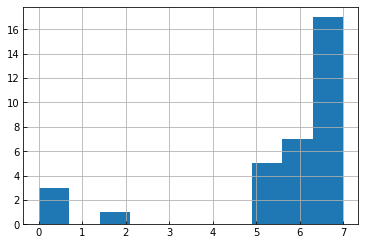

In [65]:
cb2015[(cb2015['hour']  < 8)].hour.hist()

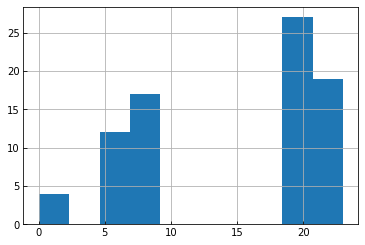

In [67]:
cb2015[((cb2015['hour'] > 18) | (cb2015['hour']  < 8))].hour.hist()

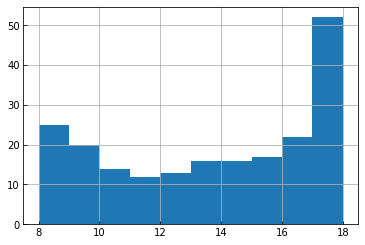

In [69]:
cb2015[~((cb2015['hour'] > 18) | (cb2015['hour']  < 8))].hour.hist()

In [92]:
night = ((cb2015['hour'] > 18) | (cb2015['hour']  < 8))

In [147]:
cb2015.shape

(279, 19)

In [148]:
cb2015[night].shape

//anaconda/envs/GEOP/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


(77, 19)

In [149]:
#daytime selected as "not night"
cb2015[~night].shape

//anaconda/envs/GEOP/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


(202, 19)

creating a GeoDataFrame from coordinates

In [71]:
cb2015[["start station latitude","start station longitude"]]

,start station latitude,start station longitude
0,40.750020,-73.969053
1000,40.743954,-73.991449
2000,40.722055,-73.989111
3000,40.732233,-73.988900
4000,40.734232,-73.986923
5000,40.735238,-74.000271
6000,40.752062,-73.981632
7000,40.762272,-73.987882
8000,40.736197,-74.008592
9000,40.741473,-73.983209


In [76]:
cb2015['lonlat'] = list(zip(cb2015["start station longitude"].values,cb2015["start station latitude"].values))

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
cb2015[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

,lonlat
0,POINT (-73.96905301 40.75001986)
1000,POINT (-73.99144871 40.74395411)
2000,POINT (-73.98911099999999 40.722055)
3000,POINT (-73.98889957 40.73223272)
4000,POINT (-73.986923 40.734232)
5000,POINT (-74.000271 40.735238)
6000,POINT (-73.9816324 40.75206231)
7000,POINT (-73.98788205 40.76227205)
8000,POINT (-74.00859207000001 40.7361967)
9000,POINT (-73.98320928 40.74147286)


In [81]:
cb2015['geometry'] = cb2015[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
cb2015.plot()

ValueError: view limit minimum -36859.209461328115 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x112f901e0> (for post_execute):


ValueError: view limit minimum -36859.209461328115 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36859.209461328115 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [84]:
cb2015 = gpd.GeoDataFrame(cb2015)

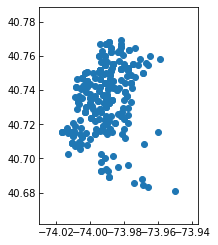

In [85]:
cb2015.plot()

I created a GeoDataFrame with a geometry series in it, but I did not assign a coordinate system yet!

In [86]:
cb2015.crs

In [87]:
cb2015.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet


In [88]:
cb2015.crs

{'init': 'epsg:4326', 'no_defs': True}

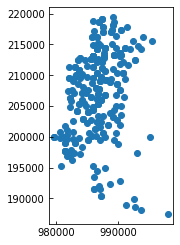

In [89]:
cb2015.to_crs(epsg=2263).plot()

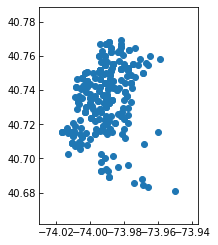

In [90]:
cb2015.plot()

In [91]:
cb2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,lonlat,geometry
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0,"(-73.96905301, 40.75001986)",POINT (-73.96905301 40.75001986)
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00,10,"(-73.99144871, 40.74395411)",POINT (-73.99144871 40.74395411)
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00,13,"(-73.989111, 40.722055)",POINT (-73.98911099999999 40.722055)
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00,15,"(-73.98889957, 40.73223272)",POINT (-73.98889957 40.73223272)
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00,17,"(-73.986923, 40.734232)",POINT (-73.986923 40.734232)


# How to use the Chi Square test - (requested topic)
I will focus on the chi sq test for proportions, the chi sq test for goodness of fit cannot be used correctly until we understand errors (next lecture)

In [131]:
sp.stats.chisquare?

get the number of trips that last over 1000 minutes

In [152]:
(cb2015[night].tripduration > 1000).sum()

//anaconda/envs/GEOP/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


14

In [153]:
(cb2015[night].tripduration <= 1000).sum()

//anaconda/envs/GEOP/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


63

In [154]:
[(cb2015[night].tripduration > 1000).sum(), 
 (cb2015[night].tripduration <= 1000).sum()]

//anaconda/envs/GEOP/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


[14, 63]

I can use the chi squared test to see if this is consistent with an even split (50% with 2 classes). If I pass a single array to the function sp.stats.chisquare it will assume that this is my array of proportions, one number for each one of my classes, and that we want to test the assumption that these number are consistent with the classes beeing popultated identically.

In [110]:
sp.stats.chisquare([(cb2015[night].tripduration > 1000).sum(), 
 (cb2015[night].tripduration <= 1000).sum()])

Power_divergenceResult(statistic=30.39240506329114, pvalue=3.529071864938018e-08)

Or I can use the same test to test if a split in classes is consistent between 2 samples (like the re-employment programs exercise). I need to pass sp.stats.chisquare() 2 arrays of same size (each array has N numbers where N is the number of classes)

test if the split between trips longer than 1000 minutes and shorted than 1000 minutes is the same during the day and during the night. 

In [132]:
[(cb2015[~night].tripduration > 1000).sum(), 
 (cb2015[~night].tripduration <= 1000).sum()]

[42, 165]

In [133]:
sp.stats.chisquare([(cb2015[night].tripduration > 1000).sum(), 
 (cb2015[night].tripduration <= 1000).sum()], 
[(cb2015[~night].tripduration > 1000).sum(), 
 (cb2015[~night].tripduration <= 1000).sum()])


Power_divergenceResult(statistic=79.18138528138529, pvalue=5.666144133125448e-19)

Test to see if a given sample comes fro a given distribution include AD and KS tests

In [ ]:
# this is WRONG for this purpost
sp.stats.kstest(cb2015.tripduration.values, "norm")

this test will compare the exact distribution, so if I want to just compare the _shape_ of the distribution (not compare its mean and standard deviations) I need to _standardize_ the distribution (make it mean 0 and std 1 like the standard normal)

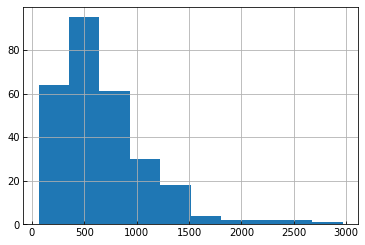

In [155]:
cb2015.tripduration.hist()

(array([64., 95., 61., 30., 18.,  4.,  2.,  2.,  2.,  1.]),
 array([-1.38853739, -0.72404322, -0.05954905,  0.60494512,  1.26943929,
         1.93393346,  2.59842762,  3.26292179,  3.92741596,  4.59191013,
         5.2564043 ]),
 <a list of 10 Patch objects>)

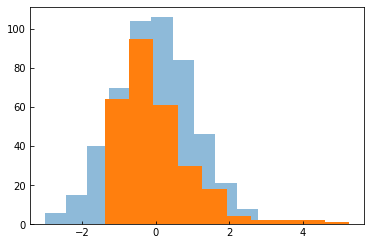

In [164]:
pl.hist(np.random.randn(500), alpha=0.5)
pl.hist((cb2015.tripduration.values - cb2015.tripduration.values.mean()) / cb2015.tripduration.values.std())


In [138]:
sp.stats.kstest((cb2015.tripduration.values - cb2015.tripduration.values.mean()) / cb2015.tripduration.values.std(), "norm")

KstestResult(statistic=0.11020529110633848, pvalue=0.0017624145717405337)

tests that only compare shapes, regardless of the mean, include tests for correlation

In [165]:
#I have to remove the nans before running a Pearson's r test
cb2015.dropna(inplace=True)

In [166]:
stats.pearsonr(cb2015.tripduration.values, cb2015['birth year'].values)

(-0.07610462164848648, 0.20503752589008437)

# REMINDERS: I may add to this, continue checking. 


## reminder about spatial joins and spatial comparisons: YOU NEED TO BE IN THE SAME COORDINATE SYSTEM! and in most cases you should be in a Cartesian coordinate system, like epsg=2263

In [167]:
tmp_ = gpd.sjoin(man.to_crs(cb2015.crs), cb2015)

In [119]:
gpd.sjoin(man.to_crs(cb2015.crs), cb2015)

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,lonlat
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,Pershing Square North,40.751873,-73.977706,18655,Subscriber,1941.0,1,2015-01-30 10:52:00,10,"(-73.96592976, 40.75455731)"
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,E 37 St & Lexington Ave,40.748238,-73.978311,15472,Subscriber,1946.0,2,2015-01-03 10:17:00,10,"(-73.967416, 40.756014)"
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,...,6 Ave & Broome St,40.724399,-74.004704,18425,Customer,NaN,0,2015-01-22 13:30:00,13,"(-73.97069431, 40.75828065)"
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,...,Carmine St & 6 Ave,40.730386,-74.002150,16542,Subscriber,1986.0,2,2015-01-22 19:53:00,19,"(-73.97722479, 40.76340613)"
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,...,E 59 St & Sutton Pl,40.758491,-73.959206,17120,Subscriber,1981.0,1,2015-01-15 21:17:00,21,"(-73.97722479, 40.76340613)"
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,Broadway & W 29 St,40.746201,-73.988557,15924,Subscriber,1958.0,2,2015-01-09 09:35:00,9,"(-73.98721619, 40.75299641)"
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,University Pl & E 14 St,40.734927,-73.992005,21029,Subscriber,1958.0,1,2015-01-15 06:04:00,6,"(-73.99138152, 40.75466591)"
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,W 26 St & 8 Ave,40.747348,-73.997236,19937,Subscriber,1987.0,1,2015-01-23 18:06:00,18,"(-73.99138152, 40.75466591)"
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,Broadway & W 24 St,40.742354,-73.989151,15753,Subscriber,1965.0,1,2015-01-09 15:18:00,15,"(-73.99138152, 40.75466591)"
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,E 24 St & Park Ave S,40.740964,-73.986022,14586,Subscriber,1975.0,1,2015-01-30 07:30:00,7,"(-73.99138152, 40.75466591)"


## reminder: review basig merging and gruoing operators: .merge(), .groupby()
and operators to manipulate values of dataframes and series, .map(), .apply(), .as_type()

In [122]:
tmp_.groupby("ct2010")

In [123]:
tmp_.groupby("ct2010").count()

,boro_code,boro_ct201,boro_name,cdeligibil,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,...,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,lonlat
ct2010,,,,,,,,,,,,,,,,,,,,,
000202,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
000600,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000700,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
000900,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
001401,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
001501,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
001502,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
001600,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
001800,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [126]:
tmp_.groupby("ct2010").count().reset_index()[["ct2010", "lonlat"]]

,ct2010,lonlat
0,000202,2
1,000600,1
2,000700,7
3,000900,1
4,001401,1
5,001501,1
6,001502,3
7,001600,4
8,001800,5
9,002000,1


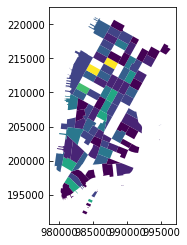

In [129]:
man.merge(tmp_.groupby("ct2010").count().reset_index()[["ct2010", "lonlat"]], on="ct2010").plot(column="lonlat")

## Reminder: Spatial weights. You can create weights from a shapefile or from a read in GeoDataFrame


In [169]:
import pysal as ps
w = ps.weights.Queen.from_dataframe(man)

//anaconda/envs/GEOP/lib/python3.6/site-packages/pysal/weights/weights.py:189: UserWarning: There are 3 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
//anaconda/envs/GEOP/lib/python3.6/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 815, 1293, 1775
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


these weight methods define matrices that tell you how things are supposed to affect each other based on proximity. Proximity can be defined in different ways: distance "as the bird flies" for example, or contiguity (things that touch each other). Thus they have to have a value for every entry in relationship with every other entry: they are matrices. 


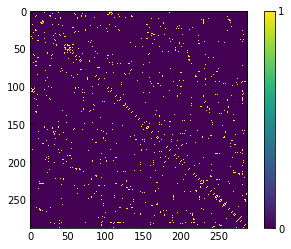

In [176]:
pl.imshow(w.full()[0])
pl.colorbar(ticks=[0,1])

The Queens matrix is a matrix of 1-0: if two geographies touch each other it is 1 otherwise 0. 

For a given row (a given Census Tract) each column is 1 if the census tract on that column touches the first census tract, 0 otherwise.


The higher incidence of 1's along the diagonal is because of the way our GeoDataFrame is ordered: nearby things are near im the geodataframe, so things along the diagonal might touch each other. 